In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [38]:
df = pd.read_csv('pop_data/source-data-unhcr-pdf-reports.csv')

df.head()

,#date,days,Niger,Burkina,Maurit,Togo,Guinea,Total,Internally Displaced
0,08-03-2012,0,16134,22639,34156,20,45,69350,81463
1,19-03-2012,11,18965,22974,39490,20,45,81494,93439
2,30-03-2012,22,19927,22974,46008,20,45,88974,93439
3,24-04-2012,47,36688,46354,60998,20,45,144105,132724
4,15-05-2012,68,38242,56817,61287,20,44,156410,146900


In [39]:

date = pd.to_datetime(df['#date'],format = '%d-%m-%Y')
nig = np.array(df['Niger'])
bf = np.array(df['Burkina']+df['Togo'])
mau = np.array(df['Maurit'])
gui = np.array(df['Guinea'])
ref = np.array(df['Total'])
idp = np.array(df['Internally Displaced'])
oth = ref - nig - bf - mau - gui




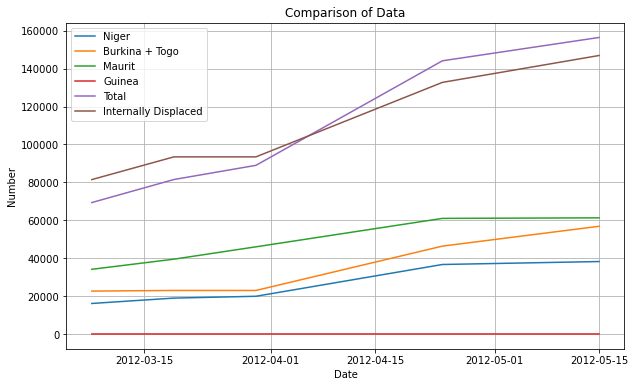

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(date, nig, label='Niger')
plt.plot(date, bf, label='Burkina + Togo')
plt.plot(date, mau, label='Maurit')
plt.plot(date, gui, label='Guinea')
plt.plot(date, ref, label='Total')
plt.plot(date, idp, label='Internally Displaced')

plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Comparison of Data')
plt.legend()
plt.grid(True)

plt.show()

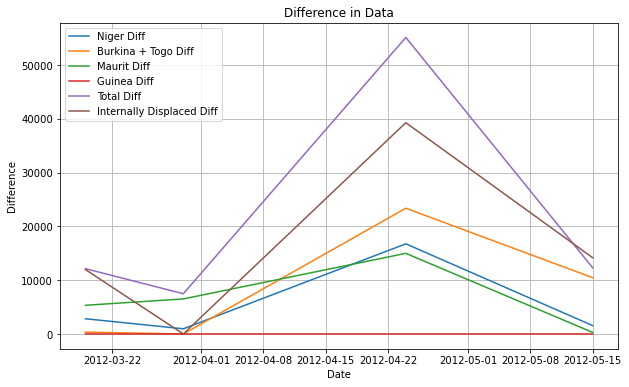

In [41]:
date = pd.to_datetime(df['#date'], format='%d-%m-%Y')
nig_diff = np.diff(np.array(df['Niger']))
bf_diff = np.diff(np.array(df['Burkina'] + df['Togo']))
mau_diff = np.diff(np.array(df['Maurit']))
gui_diff = np.diff(np.array(df['Guinea']))
ref_diff = np.diff(np.array(df['Total']))
idp_diff = np.diff(np.array(df['Internally Displaced']))

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(date[1:], nig_diff, label='Niger Diff')
plt.plot(date[1:], bf_diff, label='Burkina + Togo Diff')
plt.plot(date[1:], mau_diff, label='Maurit Diff')
plt.plot(date[1:], gui_diff, label='Guinea Diff')
plt.plot(date[1:], ref_diff, label='Total Diff')
plt.plot(date[1:], idp_diff, label='Internally Displaced Diff')

plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Difference in Data')
plt.legend()
plt.grid(True)

plt.show()

In [42]:
date_range = pd.date_range(start='2012-01-01', end='2013-01-01')

def prepare_data(df, date_col, value_col, date_range):
    df[date_col] = pd.to_datetime(df[date_col], format='%Y-%m-%d')
    df.set_index(date_col, inplace=True)

    # Interpolating missing dates
    df = df.reindex(date_range).interpolate(method='time')

    # Extrapolating the first and last values if necessary
    df = df.fillna(method='ffill').fillna(method='bfill')

    return df

#nig

tabareybarey = pd.read_csv('pop_data/nig-tabareybarey.csv')
tabareybarey = prepare_data(tabareybarey, '#DateTime','Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)', date_range)

niamey = pd.read_csv('pop_data/nig-niamey.csv')
niamey = prepare_data(niamey, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

mangaize = pd.read_csv('pop_data/nig-mangaize.csv')
mangaize = prepare_data(mangaize, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

intikane = pd.read_csv('pop_data/nig-intikane.csv')
intikane = prepare_data(intikane, 'DateTime','Nombre estimé de réfugiés maliens par période', date_range)

abala = pd.read_csv('pop_data/nig-abala.csv')
abala = prepare_data(abala, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

#mau

mbera = pd.read_csv('pop_data/mau-mbera.csv')
mbera = prepare_data(mbera, 'DateTime','Réfugiés maliens', date_range)

fassala = pd.read_csv('pop_data/mau-fassala.csv')
fassala = prepare_data(fassala, 'DateTime','Réfugiés maliens', date_range)

#bf

ouagadougou = pd.read_csv('pop_data/bf-ouagadougou.csv')
ouagadougou = prepare_data(ouagadougou, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

mentao = pd.read_csv('pop_data/bf-mentao.csv')
mentao = prepare_data(mentao, '#DateTime','Nombre estimé de réfugiés maliens par période (border opens on 21st of March)', date_range)

goudoubo = pd.read_csv('pop_data/bf-goudoubo.csv')
goudoubo = prepare_data(goudoubo, '#DateTime','Nombre estimé de réfugiés maliens par période', date_range)

bobo = pd.read_csv('pop_data/bf-bobo.csv')
bobo = prepare_data(bobo, '#DateTime','Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)', date_range)

camps = [bobo,goudoubo,ouagadougou,fassala,mbera,abala,intikane,mangaize,niamey,tabareybarey]




  

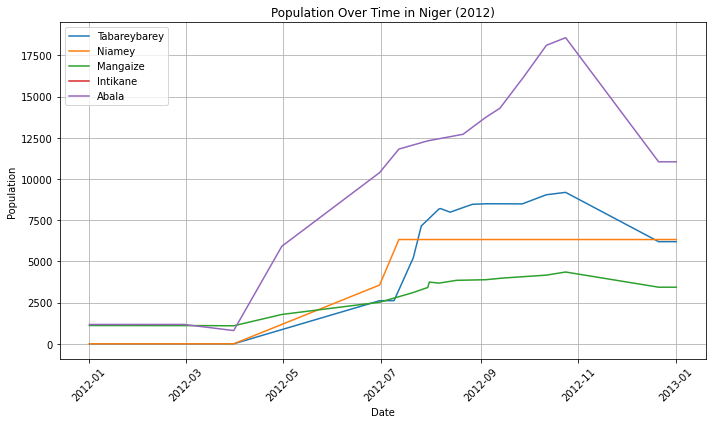

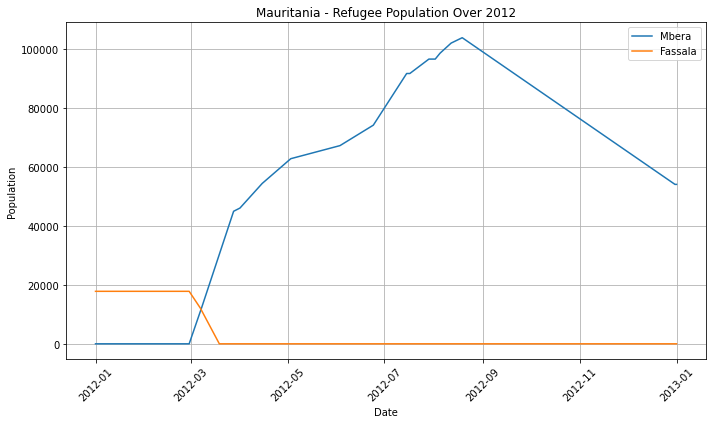

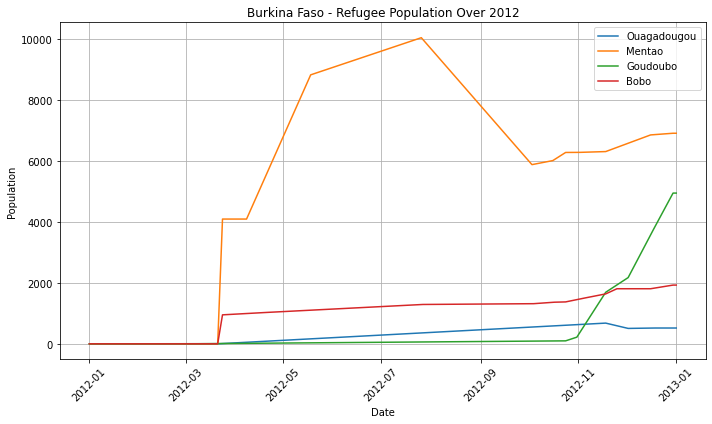

In [43]:
plt.figure(figsize=(10, 6))

# Plot for Niger
plt.plot(tabareybarey.index, tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Tabareybarey')
plt.plot(niamey.index, niamey['Nombre estimé de réfugiés maliens par période'], label='Niamey')
plt.plot(mangaize.index, mangaize['Nombre estimé de réfugiés maliens par période'], label='Mangaize')
plt.plot(intikane.index, intikane['Nombre estimé de réfugiés maliens par période'], label='Intikane')
plt.plot(abala.index, abala['Nombre estimé de réfugiés maliens par période'], label='Abala')

plt.title('Population Over Time in Niger (2012)')  
plt.xlabel('Date')  
plt.ylabel('Population') 
plt.grid(True)  
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()  
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mbera.index, mbera['Réfugiés maliens'], label='Mbera')
plt.plot(fassala.index, fassala['Réfugiés maliens'], label='Fassala')
plt.title('Mauritania - Refugee Population Over 2012')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ouagadougou.index, ouagadougou['Nombre estimé de réfugiés maliens par période'], label='Ouagadougou')
plt.plot(mentao.index, mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'], label='Mentao')
plt.plot(goudoubo.index, goudoubo['Nombre estimé de réfugiés maliens par période'], label='Goudoubo')
plt.plot(bobo.index, bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Bobo')

plt.title('Burkina Faso - Refugee Population Over 2012')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
sim = pd.read_csv("Camp_splits.csv")


date_sim=pd.to_datetime(sim['Date'], format='%Y-%m-%d')
bobo_sim=sim['Bobo']
goudoubo_sim=sim['Goudoubo']
mentao_sim=sim['Mentao']
ouagadougou_sim=sim['Ouagadougou']
fassala_sim=sim['Fassala']
mbera_sim=sim['Mbera']
abala_sim=sim['Abala']
intikane_sim=sim['Intikane']
mangaize_sim=sim['Mangaize']
niamey_sim=sim['Niamey']
tabareybarey_sim=sim['Tabareybarey']

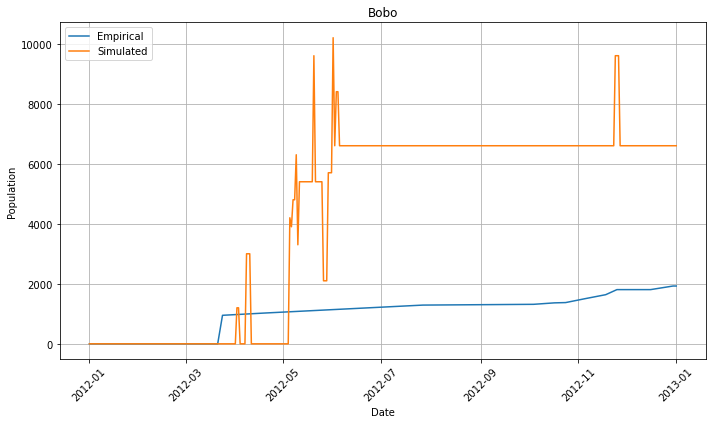

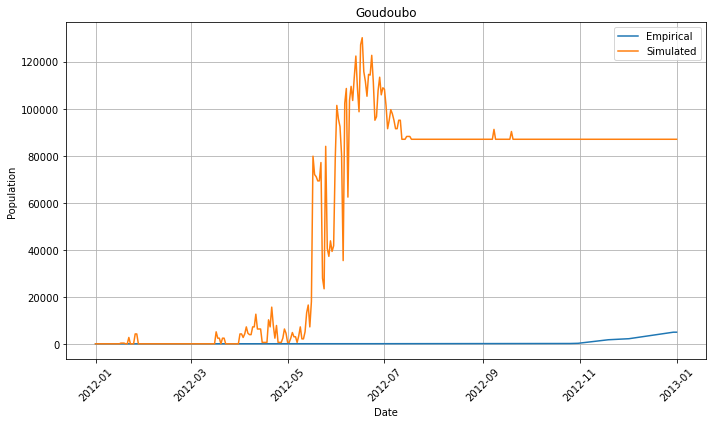

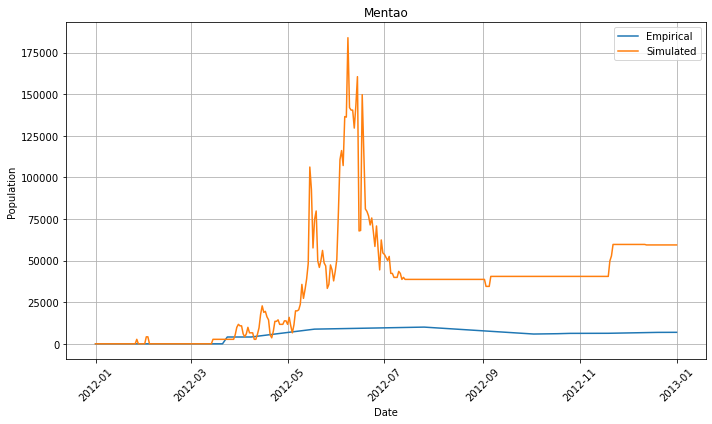

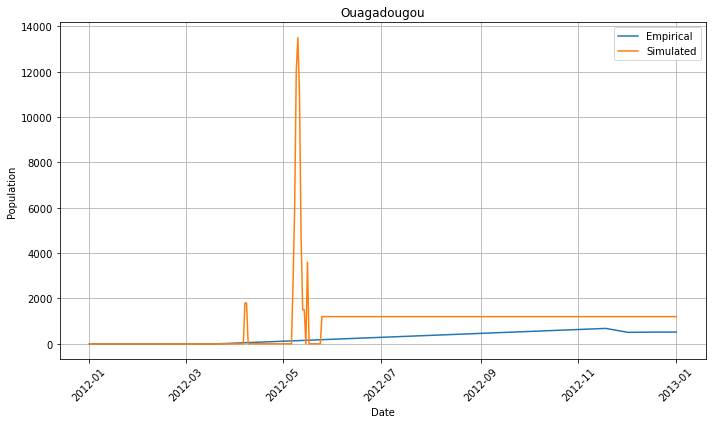

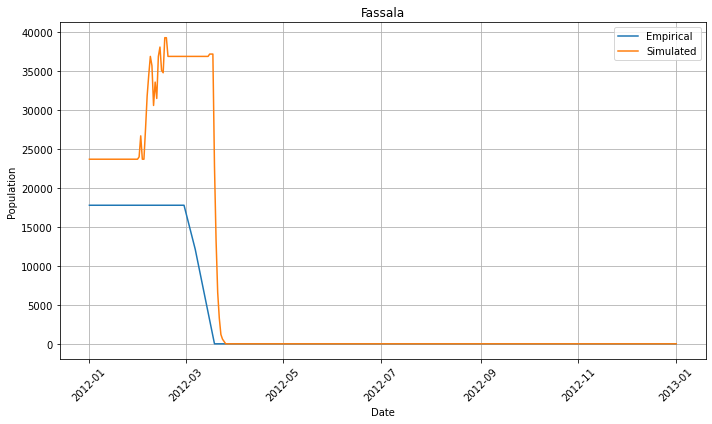

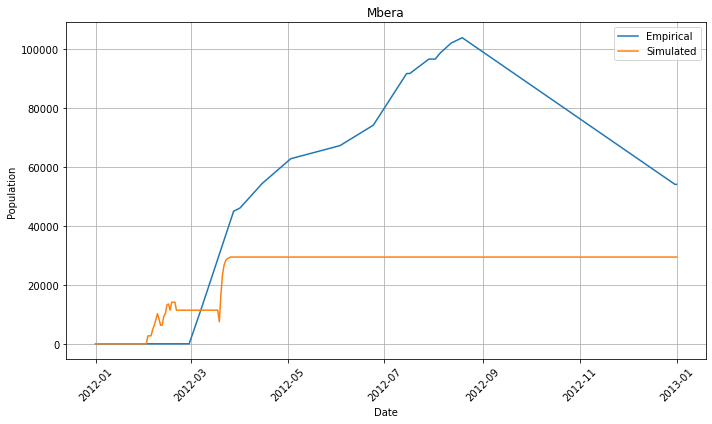

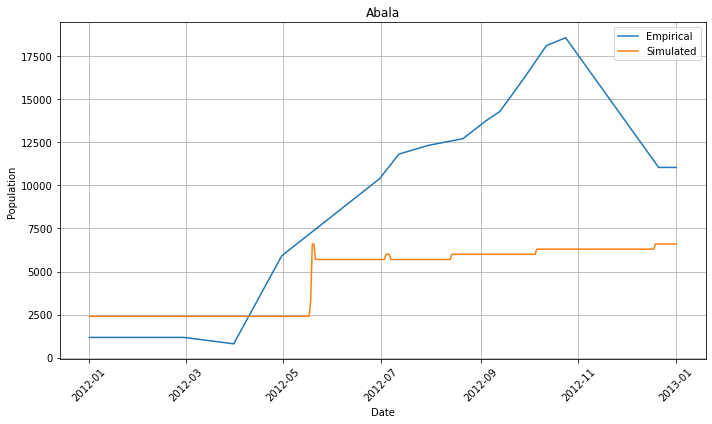

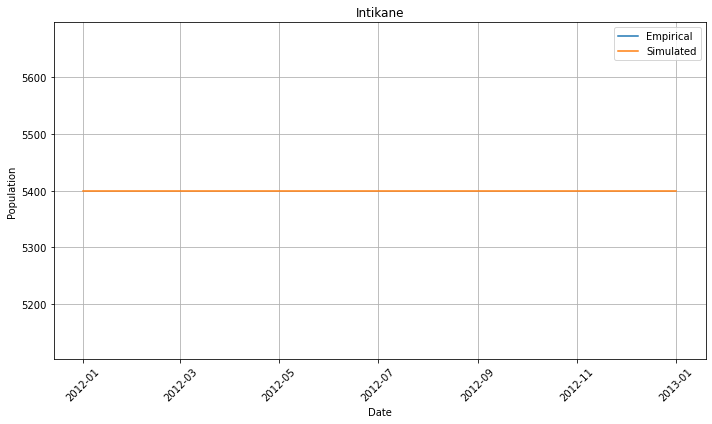

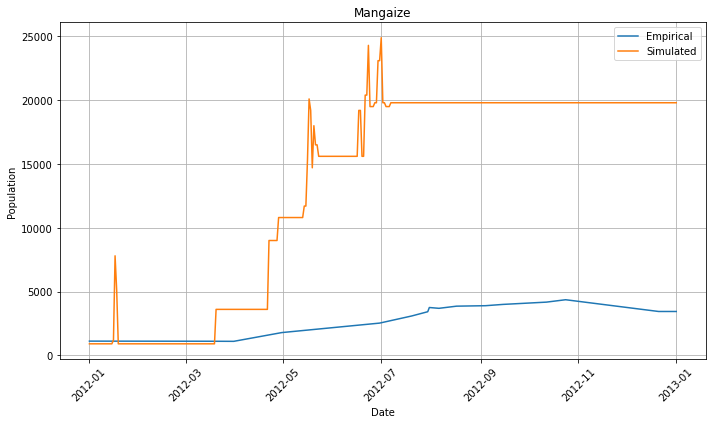

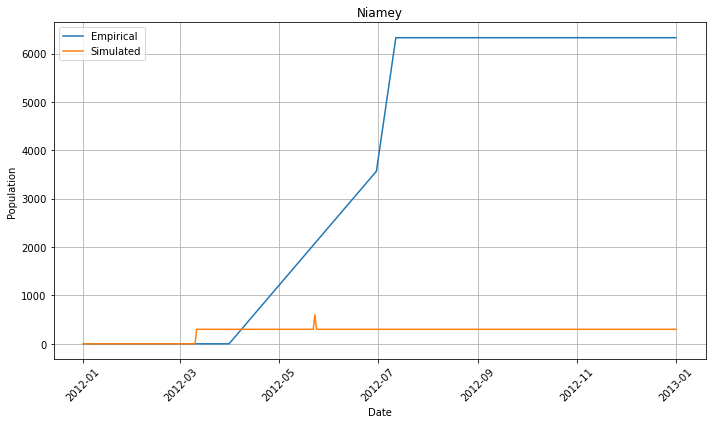

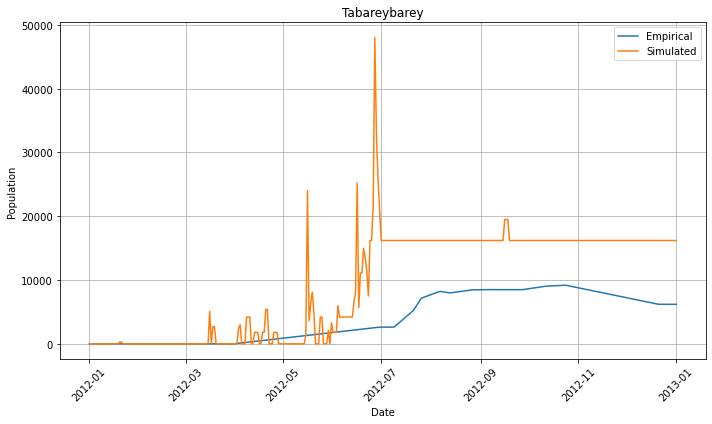

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(bobo.index, bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Empirical')
plt.plot(date_sim,bobo_sim, label='Simulated')
plt.title('Bobo')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(goudoubo.index, goudoubo['Nombre estimé de réfugiés maliens par période'], label='Empirical')
plt.plot(date_sim,goudoubo_sim, label='Simulated')
plt.title('Goudoubo')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mentao.index, mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'], label='Empirical')
plt.plot(date_sim,mentao_sim, label='Simulated')
plt.title('Mentao')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ouagadougou.index, ouagadougou['Nombre estimé de réfugiés maliens par période'], label='Empirical')
plt.plot(date_sim,ouagadougou_sim, label='Simulated')
plt.title('Ouagadougou')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(fassala.index, fassala['Réfugiés maliens'], label='Empirical')
plt.plot(date_sim,fassala_sim, label='Simulated')
plt.title('Fassala')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mbera.index, mbera['Réfugiés maliens'], label='Empirical')
plt.plot(date_sim,mbera_sim, label='Simulated')
plt.title('Mbera')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(abala.index, abala['Nombre estimé de réfugiés maliens par période'], label='Empirical')
plt.plot(date_sim,abala_sim, label='Simulated')
plt.title('Abala')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(intikane.index, intikane['Nombre estimé de réfugiés maliens par période'], label='Empirical')
plt.plot(date_sim,intikane_sim, label='Simulated')
plt.title('Intikane')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mangaize.index, mangaize['Nombre estimé de réfugiés maliens par période'], label='Empirical')
plt.plot(date_sim,mangaize_sim, label='Simulated')
plt.title('Mangaize')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(niamey.index, niamey['Nombre estimé de réfugiés maliens par période'], label='Empirical')
plt.plot(date_sim,abs(niamey_sim), label='Simulated')
plt.title('Niamey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(tabareybarey.index, tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Empirical')
plt.plot(date_sim,tabareybarey_sim, label='Simulated')
plt.title('Tabareybarey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

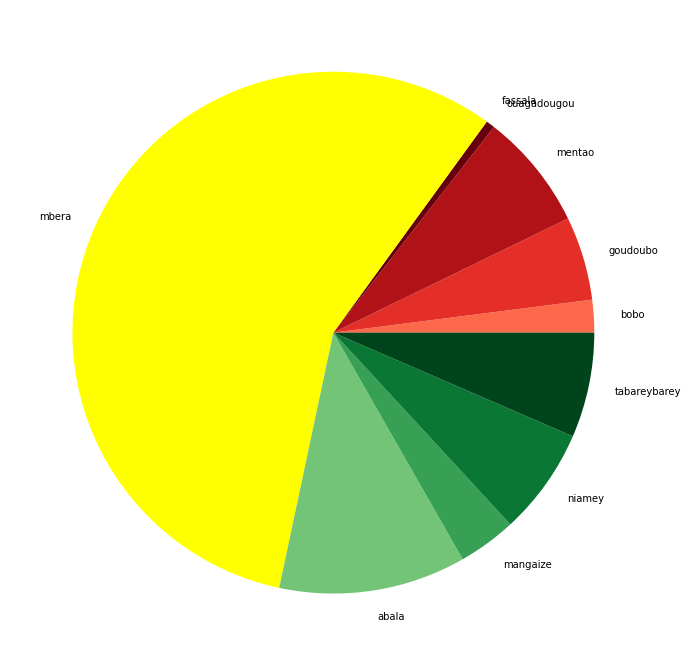

In [46]:
names = ['bobo', 'goudoubo', 'mentao', 'ouagadougou', 'fassala', 'mbera', 'abala', 'mangaize', 'niamey', 'tabareybarey']

values = [
    bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][-1],
    goudoubo['Nombre estimé de réfugiés maliens par période'][-1],
    mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'][-1],
    ouagadougou['Nombre estimé de réfugiés maliens par période'][-1],
    fassala['Réfugiés maliens'][-1],
    mbera['Réfugiés maliens'][-1],
    abala['Nombre estimé de réfugiés maliens par période'][-1],
    mangaize['Nombre estimé de réfugiés maliens par période'][-1],
    niamey['Nombre estimé de réfugiés maliens par période'][-1],
    tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][-1]
]

shades_red = plt.cm.Reds(np.linspace(0.5, 1, 4))
yellow_colors = [(1, 1, 0, i) for i in np.linspace(0.5, 1, 2)]
cmap_yellow = mcolors.LinearSegmentedColormap.from_list("yellow_shades", yellow_colors)
shades_yellow = cmap_yellow(np.linspace(0, 1, 2))
shades_green = plt.cm.Greens(np.linspace(0.5, 1, 4))

colors = [*shades_red, *shades_yellow, *shades_green]


plt.figure(figsize=(20, 12))
plt.pie(values, labels=names, colors=colors)
plt.show()

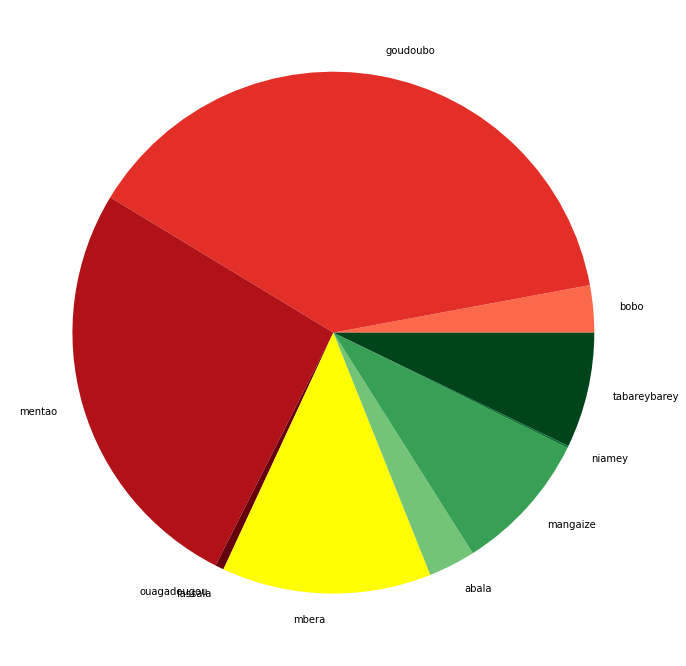

In [47]:
names = ['bobo', 'goudoubo', 'mentao', 'ouagadougou', 'fassala', 'mbera', 'abala', 'mangaize', 'niamey', 'tabareybarey']

values = [
    abs(bobo_sim.iloc[-1]),
    abs(goudoubo_sim.iloc[-1]),
    abs(mentao_sim.iloc[-1]),
    abs(ouagadougou_sim.iloc[-1]),
    abs(fassala_sim.iloc[-1]),
    abs(mbera_sim.iloc[-1]),
    abs(abala_sim.iloc[-1]),
    abs(mangaize_sim.iloc[-1]),
    abs(niamey_sim.iloc[-1]),
    abs(tabareybarey_sim.iloc[-1])
]



shades_red = plt.cm.Reds(np.linspace(0.5, 1, 4))
yellow_colors = [(1, 1, 0, i) for i in np.linspace(0.5, 1, 2)]
cmap_yellow = mcolors.LinearSegmentedColormap.from_list("yellow_shades", yellow_colors)
shades_yellow = cmap_yellow(np.linspace(0, 1, 2))
shades_green = plt.cm.Greens(np.linspace(0.5, 1, 4))

colors = [*shades_red, *shades_yellow, *shades_green]


plt.figure(figsize=(20, 12))
plt.pie(values, labels=names, colors=colors)
plt.show()

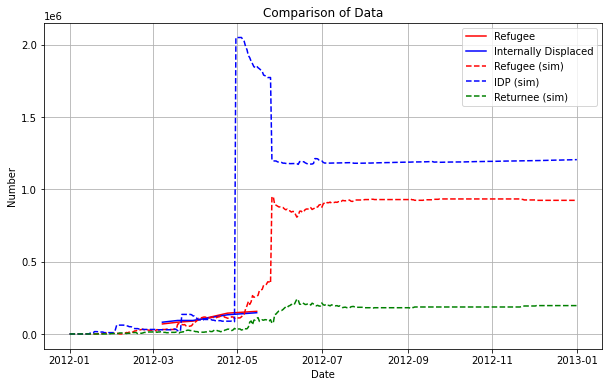

In [48]:

stat_sim = pd.read_csv("Status_splits.csv")

date_stat_sim = pd.to_datetime(stat_sim['Date'])
ref_sim = stat_sim['Refugee']
ret_sim = stat_sim['Returnee']
idp_sim = stat_sim['IDP']

plt.figure(figsize=(10, 6))


plt.plot(date, ref, label='Refugee', color='Red')
plt.plot(date, idp, label='Internally Displaced',color='Blue')

plt.plot(date_stat_sim,ref_sim,color='Red',linestyle='--',label='Refugee (sim)')
plt.plot(date_stat_sim,idp_sim,color='Blue',linestyle='--',label='IDP (sim)')
plt.plot(date_stat_sim,ret_sim,color='Green',linestyle='--',label='Returnee (sim)')



plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Comparison of Data')
plt.legend()
plt.grid(True)

plt.show()

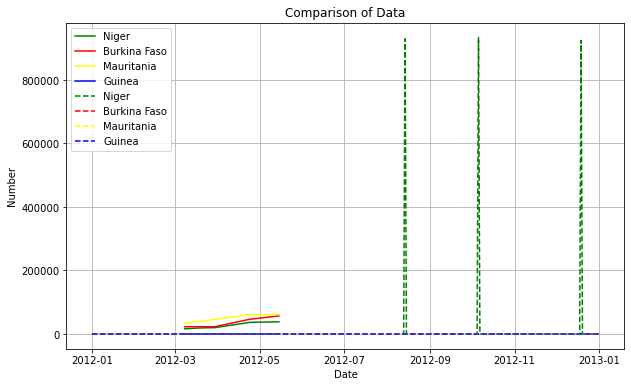

In [49]:
count_sim = pd.read_csv("Country_split_refugees.csv")

date_count_sim = pd.to_datetime(count_sim['Date'])
nig_sim = count_sim['Niger']
bf_sim = count_sim['Burkina Faso']
mau_sim = count_sim['Mauritania']
gui_sim =count_sim['Guinea']


plt.figure(figsize=(10, 6))


plt.plot(date, nig, label='Niger', color='Green')
plt.plot(date, bf, label='Burkina Faso',color='Red')
plt.plot(date, mau, label='Mauritania',color='Yellow')
plt.plot(date, gui, label='Guinea',color='Blue')

plt.plot(date_count_sim, nig_sim, label='Niger', color='Green',linestyle='--')
plt.plot(date_count_sim, bf_sim, label='Burkina Faso',color='Red',linestyle='--')
plt.plot(date_count_sim, mau_sim, label='Mauritania',color='Yellow',linestyle='--')
plt.plot(date_count_sim, gui_sim, label='Guinea',color='Blue',linestyle='--')





plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Comparison of Data')
plt.legend()
plt.grid(True)

plt.show()

In [50]:
flee = pd.read_csv("Fleeresults.csv")

flee.columns

Index(['Day', 'Mbera sim', 'Mbera data', 'Mbera error', 'Mentao sim',
       'Mentao data', 'Mentao error', 'Bobo-Dioulasso sim',
       'Bobo-Dioulasso data', 'Bobo-Dioulasso error', 'Abala sim',
       'Abala data', 'Abala error', 'Mangaize sim', 'Mangaize data',
       'Mangaize error', 'Niamey sim', 'Niamey data', 'Niamey error',
       'Tabareybarey sim', 'Tabareybarey data', 'Tabareybarey error',
       'Total error', 'refugees in camps (UNHCR)',
       'total refugees (simulation)', 'raw UNHCR refugee count',
       'retrofitted time', 'refugees in camps (simulation)', 'refugee_debt',
       'Total error (retrofitted)'],
      dtype='object')

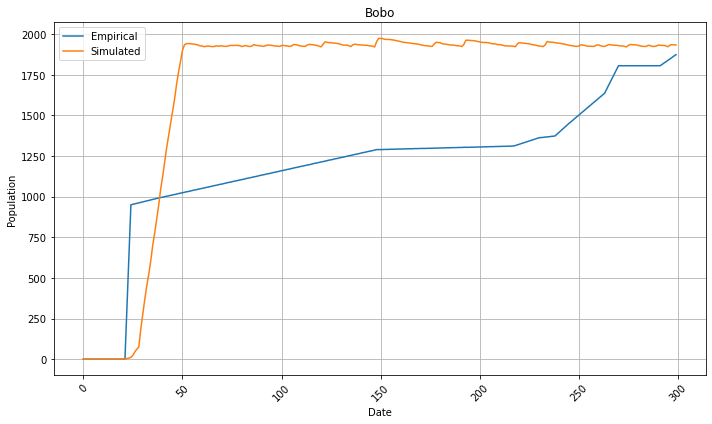

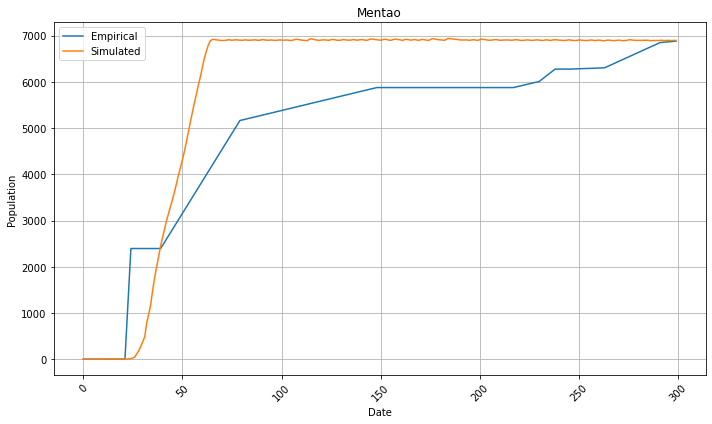

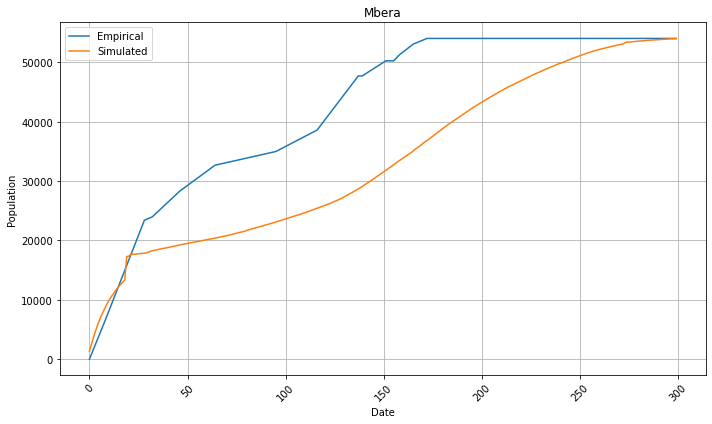

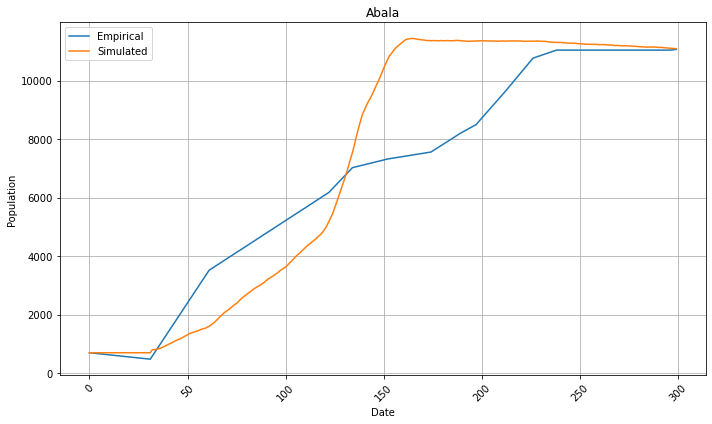

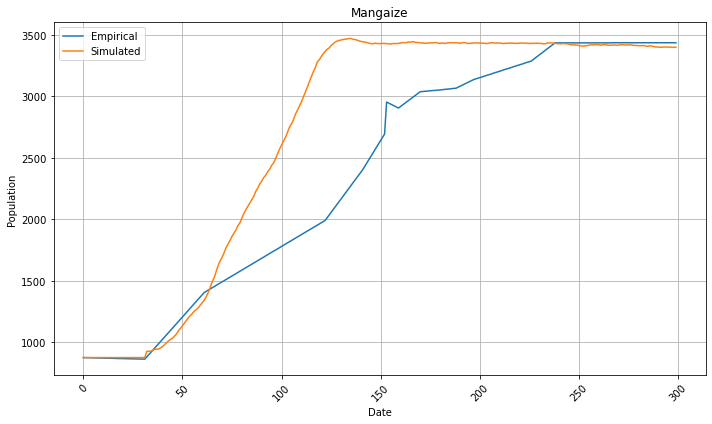

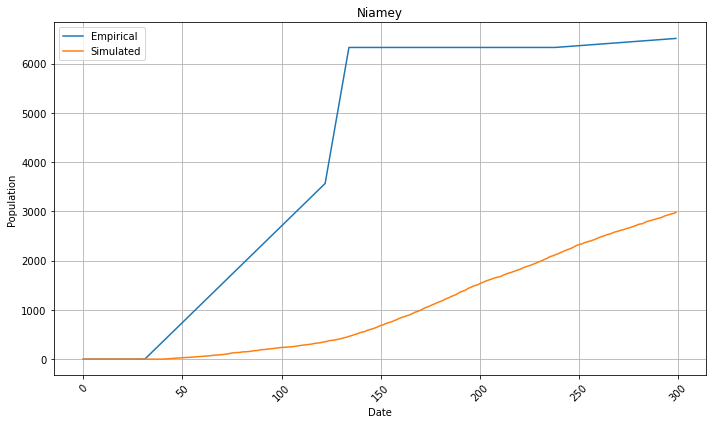

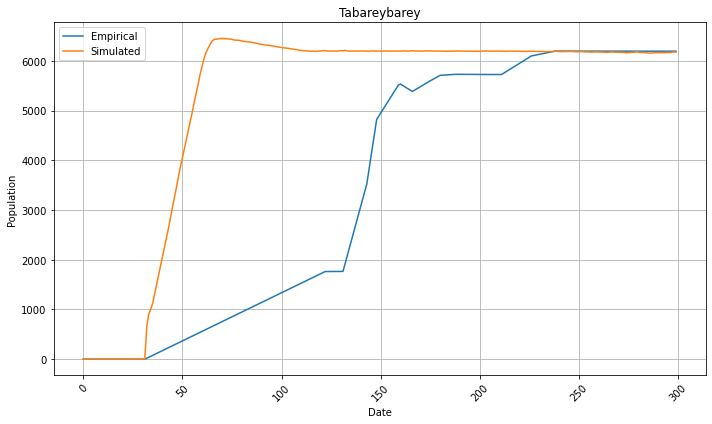

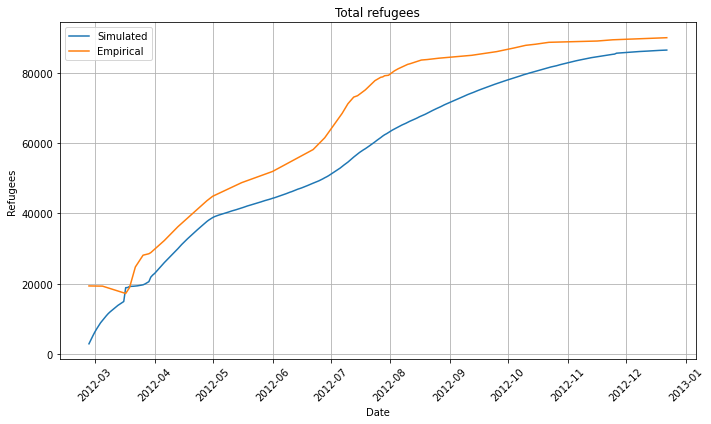

In [51]:
flee['Date'] = pd.to_datetime('2012-01-01') + pd.to_timedelta(flee['Day'], unit='D') + pd.Timedelta(days=57)

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Bobo-Dioulasso data'], label='Empirical')
plt.plot(flee['Day'],flee['Bobo-Dioulasso sim'], label='Simulated')
plt.title('Bobo')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Mentao data'], label='Empirical')
plt.plot(flee['Day'],flee['Mentao sim'], label='Simulated')
plt.title('Mentao')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Mbera data'], label='Empirical')
plt.plot(flee['Day'],flee['Mbera sim'], label='Simulated')
plt.title('Mbera')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Abala data'], label='Empirical')
plt.plot(flee['Day'],flee['Abala sim'], label='Simulated')
plt.title('Abala')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Mangaize data'], label='Empirical')
plt.plot(flee['Day'],flee['Mangaize sim'], label='Simulated')
plt.title('Mangaize')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Niamey data'], label='Empirical')
plt.plot(flee['Day'],flee['Niamey sim'], label='Simulated')
plt.title('Niamey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Day'],flee['Tabareybarey data'], label='Empirical')
plt.plot(flee['Day'],flee['Tabareybarey sim'], label='Simulated')
plt.title('Tabareybarey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(flee['Date'],flee['refugees in camps (simulation)'],label ='Simulated' )
plt.plot(flee['Date'],flee['raw UNHCR refugee count'], label='Empirical')
plt.title('Total refugees')
plt.xlabel('Date')
plt.ylabel('Refugees')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



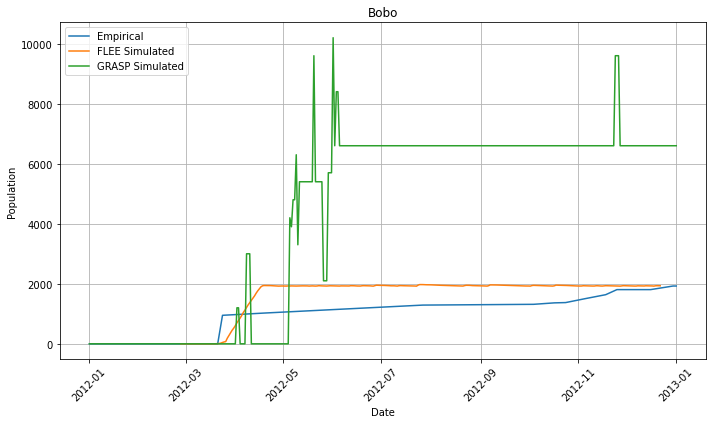

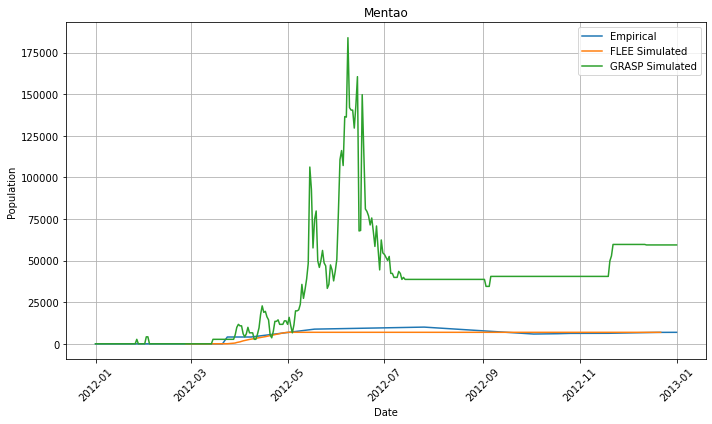

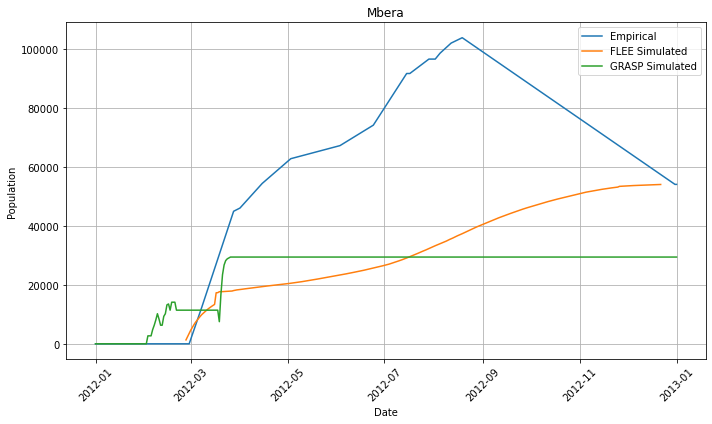

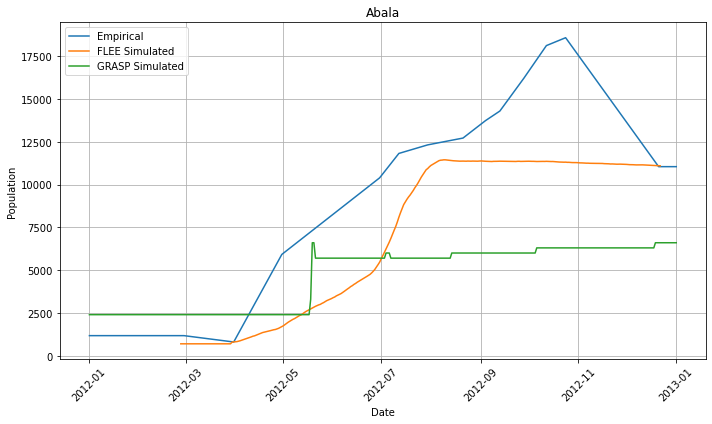

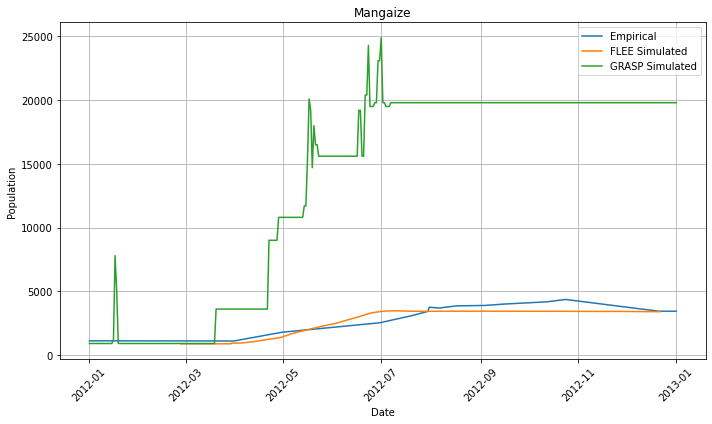

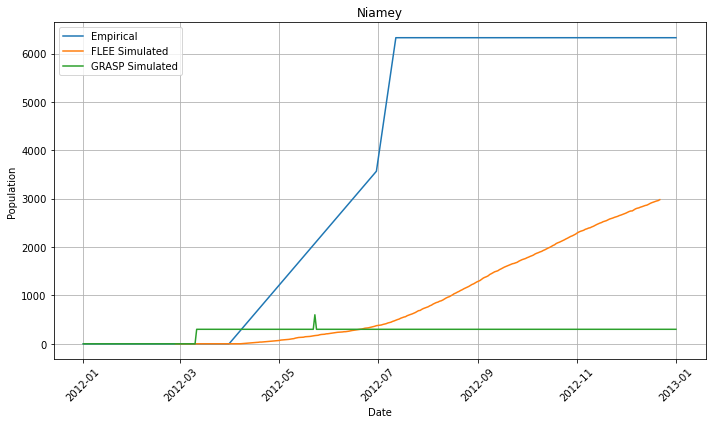

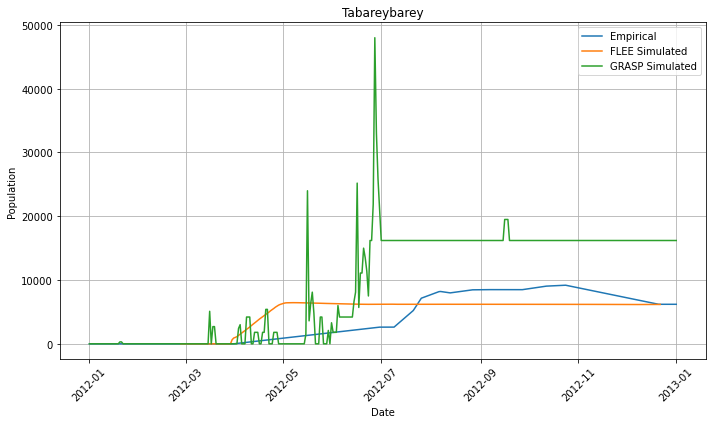

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(bobo.index, bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Empirical')
plt.plot(flee['Date'],flee['Bobo-Dioulasso sim'], label='FLEE Simulated')
plt.plot(date_sim,bobo_sim, label='GRASP Simulated')
plt.title('Bobo')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mentao.index, mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'], label='Empirical')
plt.plot(flee['Date'],flee['Mentao sim'], label='FLEE Simulated')
plt.plot(date_sim,mentao_sim, label='GRASP Simulated')
plt.title('Mentao')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mbera.index, mbera['Réfugiés maliens'], label='Empirical')
plt.plot(flee['Date'],flee['Mbera sim'], label='FLEE Simulated')
plt.plot(date_sim,mbera_sim, label='GRASP Simulated')
plt.title('Mbera')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(abala.index, abala['Nombre estimé de réfugiés maliens par période'], label='Empirical')
plt.plot(flee['Date'],flee['Abala sim'], label='FLEE Simulated')
plt.plot(date_sim,abala_sim, label='GRASP Simulated')
plt.title('Abala')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(mangaize.index, mangaize['Nombre estimé de réfugiés maliens par période'], label='Empirical')
plt.plot(flee['Date'],flee['Mangaize sim'], label='FLEE Simulated')
plt.plot(date_sim,mangaize_sim, label='GRASP Simulated')
plt.title('Mangaize')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(niamey.index, niamey['Nombre estimé de réfugiés maliens par période'], label='Empirical')
plt.plot(flee['Date'],flee['Niamey sim'], label='FLEE Simulated')
plt.plot(date_sim,abs(niamey_sim), label='GRASP Simulated')
plt.title('Niamey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(tabareybarey.index, tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'], label='Empirical')
plt.plot(flee['Date'],flee['Tabareybarey sim'], label='FLEE Simulated')
plt.plot(date_sim,tabareybarey_sim, label='GRASP Simulated')
plt.title('Tabareybarey')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

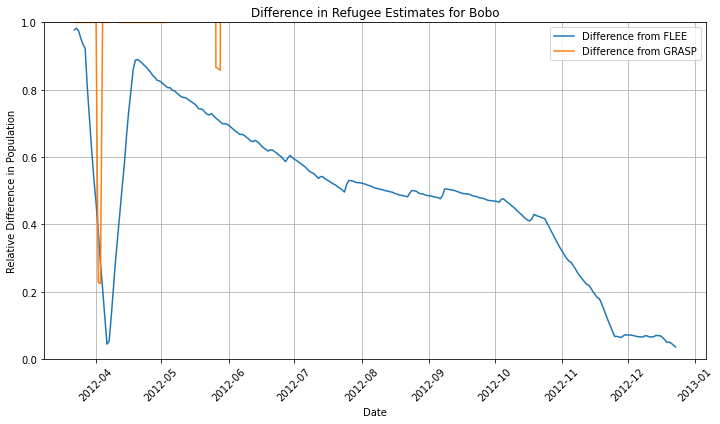

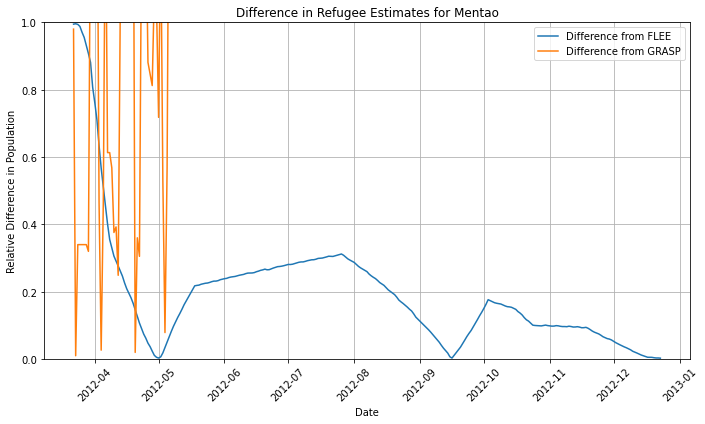

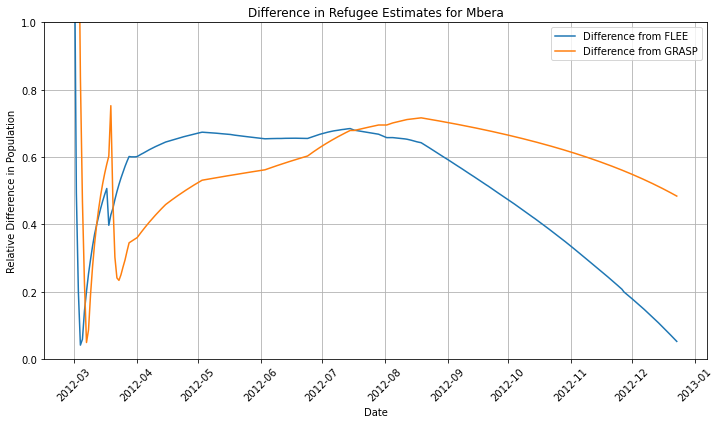

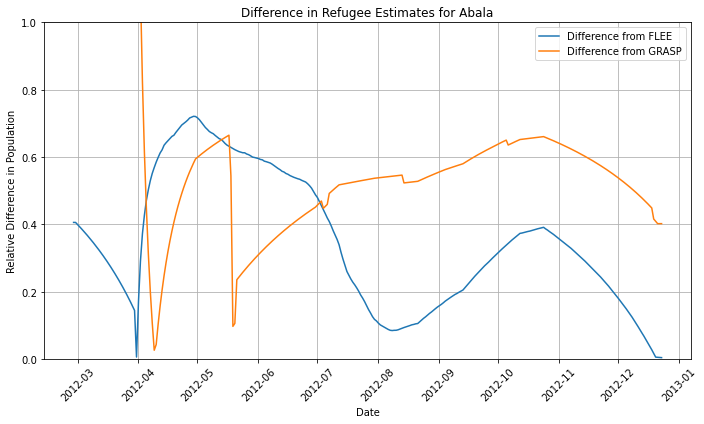

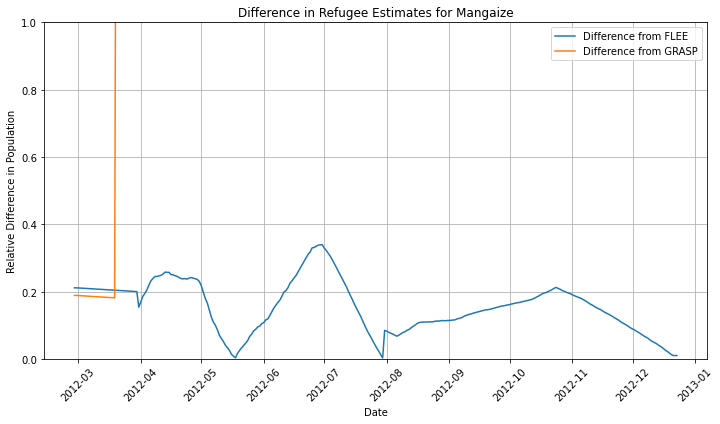

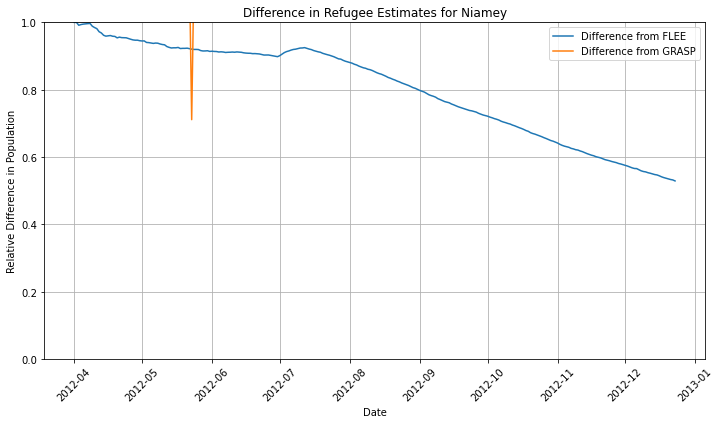

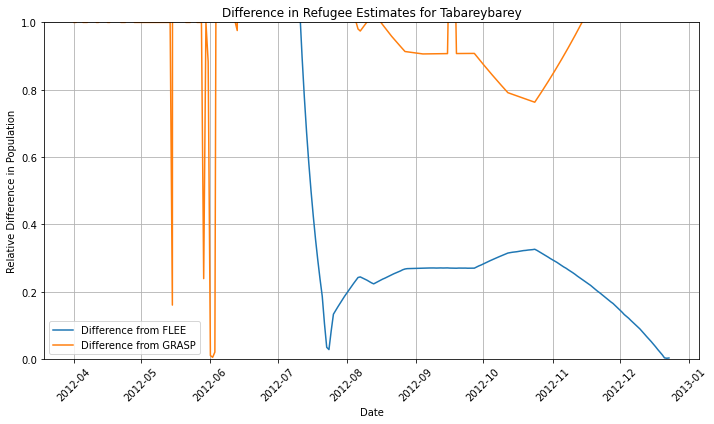

In [53]:

plt.figure(figsize=(10, 6))
difference_flee_bobo = abs((bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][58:358] - flee['Bobo-Dioulasso sim'].values)/bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][58:358])
difference_grasp_bobo = abs((bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'] - bobo_sim.values)/bobo['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'])

plt.plot(bobo.index[58:358], difference_flee_bobo, label='Difference from FLEE')
plt.plot(bobo.index[58:358], difference_grasp_bobo[58:358], label='Difference from GRASP')
plt.title('Difference in Refugee Estimates for Bobo')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_mentao = abs((mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'][58:358] - flee['Mentao sim'].values)/mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'][58:358])
difference_grasp_mentao = abs((mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'] - mentao_sim.values)/mentao['Nombre estimé de réfugiés maliens par période (border opens on 21st of March)'])

plt.plot(mentao.index[58:358], difference_flee_mentao, label='Difference from FLEE')
plt.plot(mentao.index[58:358], difference_grasp_mentao[58:358], label='Difference from GRASP')
plt.title('Difference in Refugee Estimates for Mentao')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_mbera= abs((mbera['Réfugiés maliens'][58:358] - flee['Mbera sim'].values)/mbera['Réfugiés maliens'][58:358])
difference_grasp_mbera = abs((mbera['Réfugiés maliens'] - mbera_sim.values)/mbera['Réfugiés maliens'])

plt.plot(mbera.index[58:358], difference_flee_mbera, label='Difference from FLEE')
plt.plot(mbera.index[58:358], difference_grasp_mbera[58:358], label='Difference from GRASP')
plt.title('Difference in Refugee Estimates for Mbera')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_abala = abs((abala['Nombre estimé de réfugiés maliens par période'][58:358] - flee['Abala sim'].values)/abala['Nombre estimé de réfugiés maliens par période'][58:358])
difference_grasp_abala = abs((abala['Nombre estimé de réfugiés maliens par période'] - abala_sim.values)/abala['Nombre estimé de réfugiés maliens par période'])

plt.plot(abala.index[58:358], difference_flee_abala, label='Difference from FLEE')
plt.plot(abala.index[58:358], difference_grasp_abala[58:358], label='Difference from GRASP')
plt.title('Difference in Refugee Estimates for Abala')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_mangaize = abs((mangaize['Nombre estimé de réfugiés maliens par période'][58:358] - flee['Mangaize sim'].values)/mangaize['Nombre estimé de réfugiés maliens par période'][58:358])
difference_grasp_mangaize = abs((mangaize['Nombre estimé de réfugiés maliens par période'] - mangaize_sim.values)/mangaize['Nombre estimé de réfugiés maliens par période'])

plt.plot(mangaize.index[58:358], difference_flee_mangaize, label='Difference from FLEE')
plt.plot(mangaize.index[58:358], difference_grasp_mangaize[58:358], label='Difference from GRASP')
plt.title('Difference in Refugee Estimates for Mangaize')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_niamey = abs((niamey['Nombre estimé de réfugiés maliens par période'][58:358] - flee['Niamey sim'].values)/niamey['Nombre estimé de réfugiés maliens par période'][58:358])
difference_grasp_niamey = abs((niamey['Nombre estimé de réfugiés maliens par période'] - niamey_sim.values)/niamey['Nombre estimé de réfugiés maliens par période'])

plt.plot(niamey.index[58:358], difference_flee_niamey, label='Difference from FLEE')
plt.plot(niamey.index[58:358], difference_grasp_niamey[58:358], label='Difference from GRASP')
plt.title('Difference in Refugee Estimates for Niamey')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
difference_flee_tabareybarey= abs((tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][58:358] - flee['Tabareybarey sim'].values)/tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'][58:358])
difference_grasp_tabareybarey = abs((tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'] - tabareybarey_sim.values)/tabareybarey['Nombre estimé de réfugiés maliens par période (border opens 21st of March 2012)'])

plt.plot(tabareybarey.index[58:358], difference_flee_tabareybarey, label='Difference from FLEE')
plt.plot(tabareybarey.index[58:358], difference_grasp_tabareybarey[58:358], label='Difference from GRASP')
plt.title('Difference in Refugee Estimates for Tabareybarey')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Population')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 1)
plt.show()


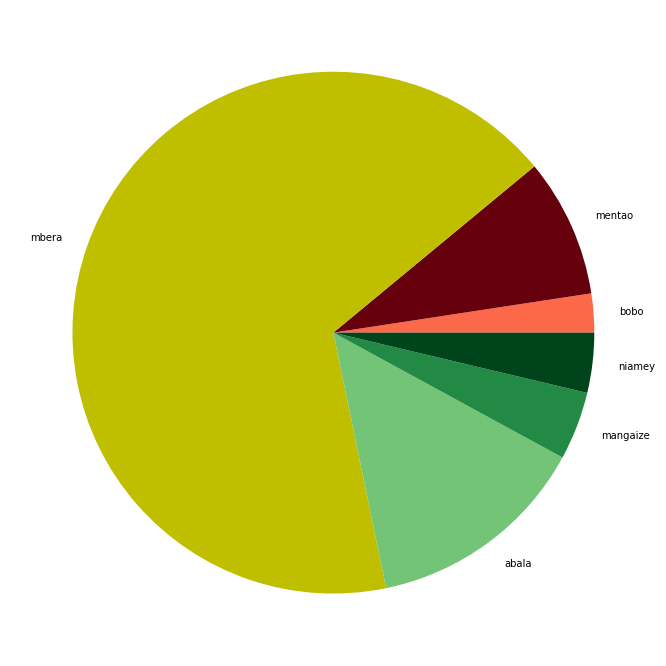

In [54]:
names = ['bobo', 'mentao','mbera', 'abala', 'mangaize', 'niamey']

values = [
    flee['Bobo-Dioulasso sim'].values[-1],
    flee['Mentao sim'].values[-1],
    flee['Mbera sim'].values[-1],
    flee['Abala sim'].values[-1],
    flee['Mangaize sim'].values[-1],
    flee['Niamey sim'].values[-1]
]

shades_red = plt.cm.Reds(np.linspace(0.5, 1, 2))
shades_yellow = ['y']
shades_green = plt.cm.Greens(np.linspace(0.5, 1, 3))

colors = [*shades_red, *shades_yellow, *shades_green]


plt.figure(figsize=(20, 12))
plt.pie(values, labels=names, colors=colors)
plt.show()